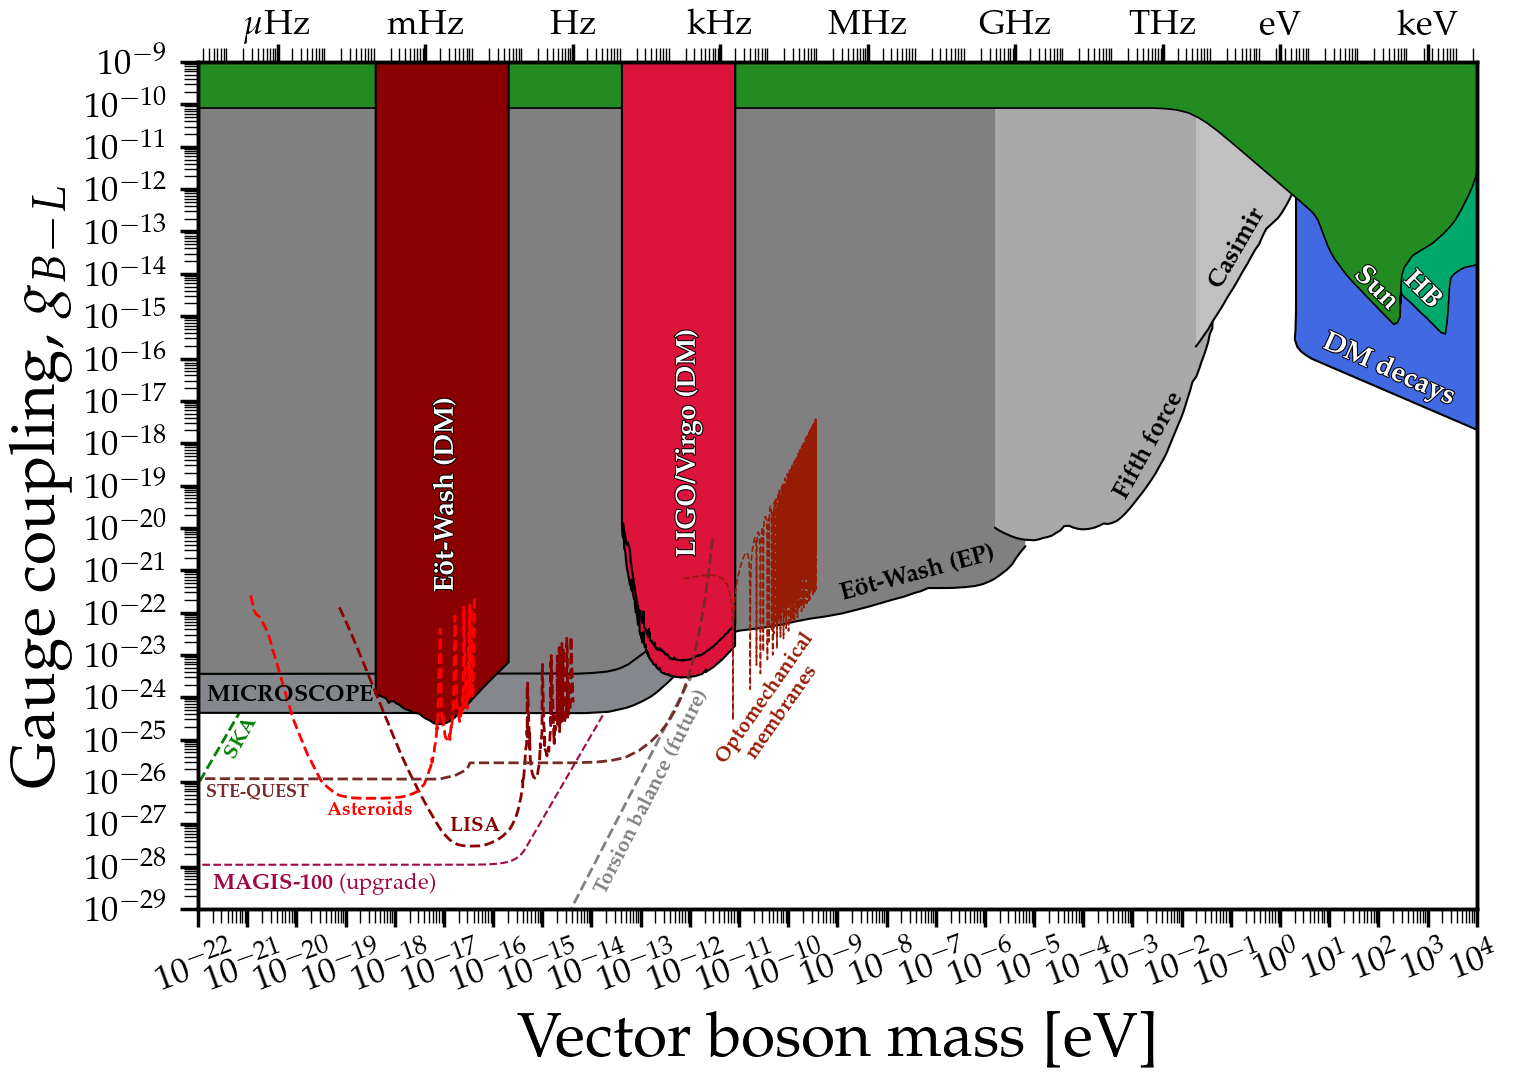

In [1]:
from numpy import *
import matplotlib.pyplot as plt
from PlotFuncs import FigSetup,MySaveFig,UnfilledLimit,UpperFrequencyAxis_Simple
from PlotFuncs_ScalarVector import VectorBL
import matplotlib as mpl  

    
# Figure setup
fig,ax = FigSetup(Shape='Rectangular',xlab='Vector boson mass [eV]',ylab=r'Gauge coupling, $g_{B-L}$',mathpazo=True,\
                              g_min=1e-29,g_max=1e-9,m_min=1e-22,m_max=1e4,FrequencyAxis=False,N_Hz=1)
m_min,m_max = ax.get_xlim()
ax2 = ax.twiny()
ax2.set_xlim([m_min*241.8*1e12,m_max*241.8*1e12])
ax2.set_xscale('log')
ax2.tick_params(labelsize=25)
ax2.tick_params(which='major',direction='out',width=2.5,length=13,pad=0)
ax2.tick_params(which='minor',direction='out',width=1,length=10)
locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=50)
locmin = mpl.ticker.LogLocator(base=10.0, subs=arange(2, 10)*.1,numticks=100)
ax2.xaxis.set_major_locator(locmaj)
ax2.xaxis.set_minor_locator(locmin)
ax2.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax2.set_xticks([1e-6,1e-3,1e0,1e3,1e6,1e9,1e12,1*241.8*1e12,1000*241.8*1e12])
ax2.set_xticklabels([r'$\mu$Hz','mHz','Hz','kHz','MHz','GHz','THz','eV','keV']);
plt.sca(ax)


# Fifth force etc.
VectorBL.MICROSCOPE(ax)
VectorBL.EotWashEP(ax)
VectorBL.InverseSquareLaw(ax)
VectorBL.Casimir(ax)

# Astro/Cosmp
VectorBL.Sun(ax)
VectorBL.HorizontalBranch(ax)
VectorBL.DMStability(ax)

# Dark matter
VectorBL.EotWashDM(ax)
VectorBL.LIGO(ax)
VectorBL.LIGOVirgo(ax)

MySaveFig(fig,'VectorB-L')

# Projections
VectorBL.MAGIS(ax)
VectorBL.OptomechanicalMembranes(ax)
VectorBL.LISA(ax)
VectorBL.SKA(ax)
VectorBL.TorsionBalance(ax)
VectorBL.Asteroids(ax)
VectorBL.STE_QUEST(ax)

MySaveFig(fig,'VectorB-L_with_Projections')

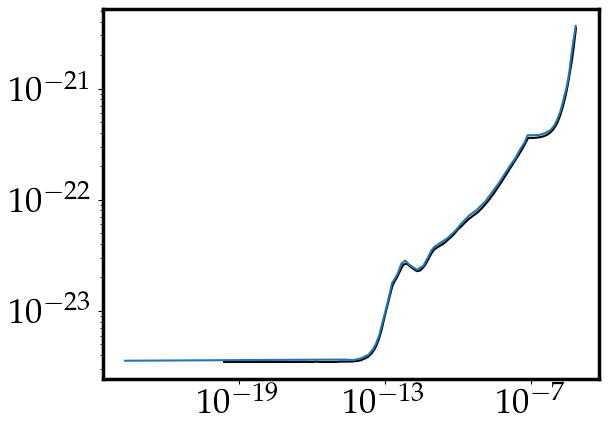

In [31]:
import os

# Force range for lambda in [m] and m_a in [eV]
def mLambda(m_a):
    return 0.1973*1e-6/m_a 

# Scalar-nucleon coupling from Yukawa alpha
def g_scalar_nucleon(alph):
    return pi*sqrt(alph/1.37e37)

Lambda,alph = loadtxt(os.path.expanduser('~/Desktop/temp.txt'),unpack=True)
m = mLambda(Lambda)
g = g_scalar_nucleon(alph)
plt.loglog(m,g,'k-')

dat = loadtxt('limit_data/vectorB-L/EotWashEP.txt')

plt.loglog(dat[:,0],dat[:,1])

In [25]:
G = 6.7e-39 # GeV^-2
mu = 931.49432/1000 # GeV

1/(4*pi*G*mu**2)

1.368847008585744e+37

In [32]:
g[-1]

3.473509371923601e-24

In [29]:
dat[-1,-1]

3.563885948804933e-24